  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [01:09<00:00,  9.95s/it]


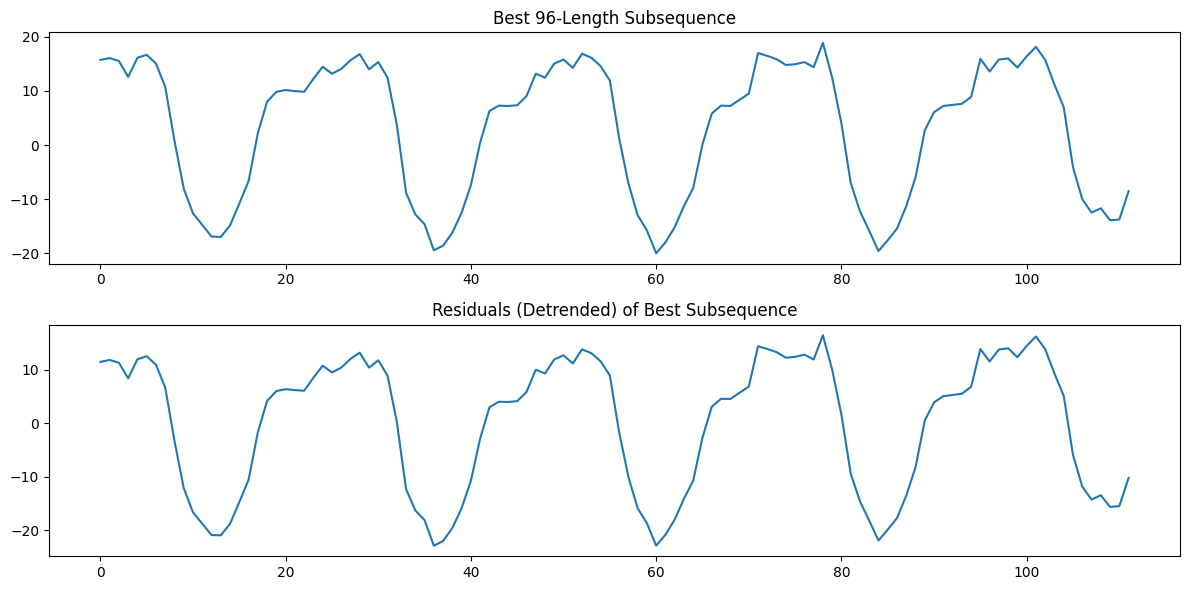

In [10]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tqdm import tqdm
# 1. 读取数据
file_path = '../../Data/ETTh1.csv'
df = pd.read_csv(file_path)

# 去掉第一列时间列
df = df.iloc[:, 1:]

# 2. 定义函数评估周期性和趋势性
def evaluate_trend_and_seasonality(data):
    # 线性回归，评估趋势性
    X = np.arange(len(data)).reshape(-1, 1)  # X为时间序列位置
    y = data  # y为数据
    model = LinearRegression().fit(X, y)
    trend = model.predict(X)  # 预测趋势
    residuals = y - trend  # 残差

    # 周期性可以通过傅里叶变换来评估
    freqs = np.fft.fftfreq(len(data))
    fft_values = np.fft.fft(data)
    magnitude = np.abs(fft_values)
    
    # 找出最大频率的幅值，用来评估周期性
    peak_freq_idx = np.argmax(magnitude[1:]) + 1  # 排除直流分量
    peak_magnitude = magnitude[peak_freq_idx]
    
    return peak_magnitude, residuals

# 3. 寻找最佳的96长度子序列
window_size = 112
best_peak_magnitude = -np.inf
best_subsequence = None
best_residuals = None

for column in tqdm(df.columns):
    data = df[column].values
    
    # 对每个列进行滑动窗口操作，计算每个窗口的周期性和趋势性
    for start_idx in tqdm(range(len(data) - window_size + 1)):
        window_data = data[start_idx:start_idx + window_size]
        
        # 评估周期性和趋势性
        peak_magnitude, residuals = evaluate_trend_and_seasonality(window_data)
        
        # 如果周期性更强，更新最佳子序列
        if peak_magnitude > best_peak_magnitude:
            best_peak_magnitude = peak_magnitude
            best_subsequence = window_data
            best_residuals = residuals

# 4. 可视化最佳子序列
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(best_subsequence)
plt.title('Best 96-Length Subsequence')
plt.subplot(2, 1, 2)
plt.plot(best_residuals)
plt.title('Residuals (Detrended) of Best Subsequence')
plt.tight_layout()
plt.show()
best_subsequence_df = pd.DataFrame(best_subsequence, columns=['Best_Subsequence'])
best_subsequence_df.to_csv(f'etth_display_W{window_size}.csv', index=False)


In [3]:
# 将 best_subsequence 转换为 DataFrame，并保存为 CSV 文件
best_subsequence_df = pd.DataFrame(best_subsequence, columns=['Best_Subsequence'])
best_subsequence_df.to_csv('etth_display.csv', index=False)


112


Text(0.5, 1.0, 'Real World Example: ETTh1 Dataset')

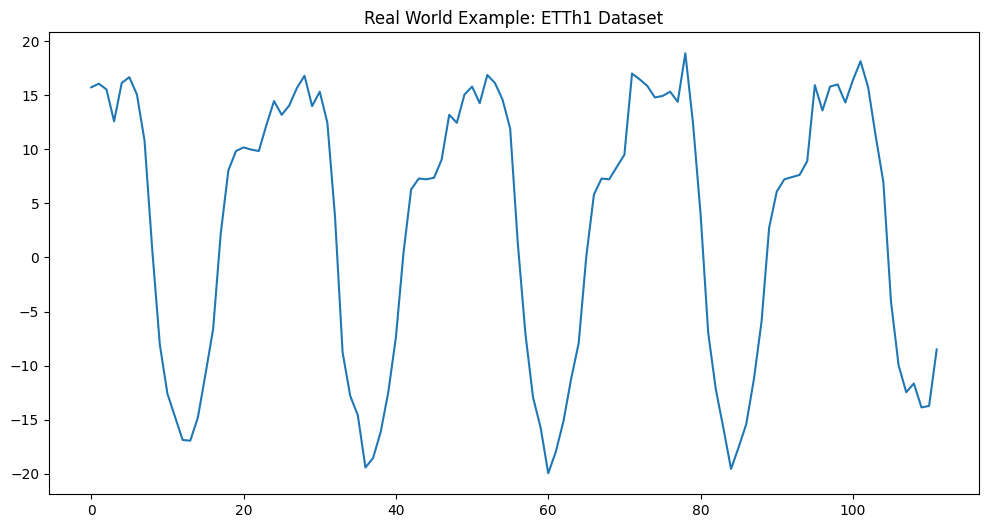

In [19]:
test_subsequence =best_subsequence
print(len(test_subsequence))
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.plot(test_subsequence)
plt.title('Real World Example: ETTh1 Dataset')